In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
d = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df= d.copy()

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:

df.shape

(27820, 12)

In [9]:

df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
df = df.rename(columns={'country':'Country' , 'year':'Year' , 'sex':'Sex' , 'age':'Age' ,
                   'suicides_no':'SuicidesNo' , 'population':'Population' , 
                   'suicides/100k pop':'Suicides/100kPop' , 'country-year':'CountryYear' ,
                   'HDI for year':'HDIForYear' , ' gdp_for_year ($) ':'GdpForYear($)', 
                   'gdp_per_capita ($)':'GdpPerCapita','generation':'Generation'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27820 non-null  object 
 1   Year              27820 non-null  int64  
 2   Sex               27820 non-null  object 
 3   Age               27820 non-null  object 
 4   SuicidesNo        27820 non-null  int64  
 5   Population        27820 non-null  int64  
 6   Suicides/100kPop  27820 non-null  float64
 7   CountryYear       27820 non-null  object 
 8   HDIForYear        8364 non-null   float64
 9   GdpForYear($)     27820 non-null  object 
 10  GdpPerCapita      27820 non-null  int64  
 11  Generation        27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [12]:

df.isnull().sum()

Country                 0
Year                    0
Sex                     0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
CountryYear             0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapita            0
Generation              0
dtype: int64

In [13]:
df.drop(['HDIForYear','CountryYear'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27820 non-null  object 
 1   Year              27820 non-null  int64  
 2   Sex               27820 non-null  object 
 3   Age               27820 non-null  object 
 4   SuicidesNo        27820 non-null  int64  
 5   Population        27820 non-null  int64  
 6   Suicides/100kPop  27820 non-null  float64
 7   GdpForYear($)     27820 non-null  object 
 8   GdpPerCapita      27820 non-null  int64  
 9   Generation        27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [14]:
display(df['Suicides/100kPop'].max())
display(df['Suicides/100kPop'].min())

224.97

0.0

In [15]:
unique_year = df['Year'].nunique()
unique_year

32

In [16]:

group_year = df.groupby('Year').sum()
group_year

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapita
Year,,,,
1985,116063,1008600086,6811.89,3508548
1986,120670,1029909613,6579.84,4104636
1987,126842,1095029726,7545.45,5645760
1988,121026,1054094424,7473.13,5870508
1989,160244,1225514347,8036.54,6068424
1990,193361,1466620100,9878.75,7531260
1991,198020,1489988384,10321.06,7782096
1992,211473,1569539447,10528.88,8195232
1993,221565,1530416654,10790.29,8231796


<AxesSubplot:xlabel='Year'>

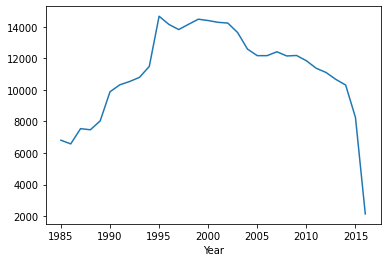

In [17]:
year_suicides = group_year['Suicides/100kPop']
year_suicides.plot()

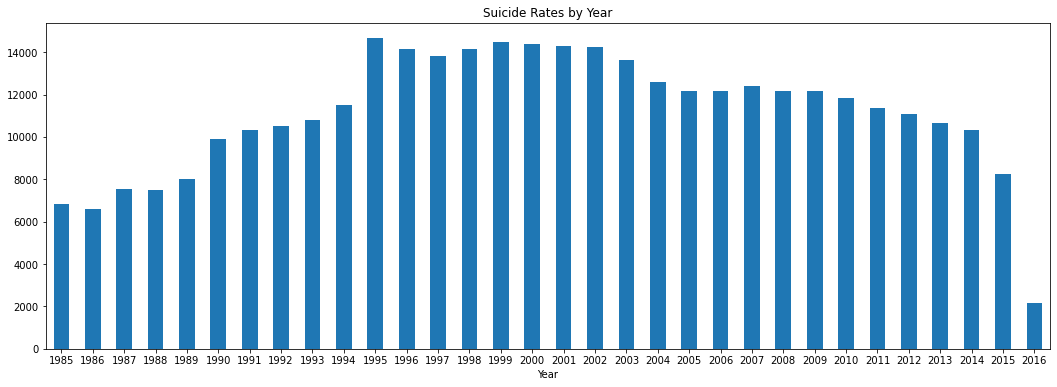

In [18]:

plt.subplots(figsize=(18,6))
group_year['Suicides/100kPop'].plot.bar(rot=0)
plt.title("Suicide Rates by Year");

In [19]:
unique_country = df['Country'].nunique()
unique_country

101

In [20]:
group_country = df.groupby('Country').sum()
group_country


,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapita
Country,,,,,
Albania,527796,1970,62325467,924.76,490788
Antigua and Barbuda,647832,11,1990228,179.14,3385212
Argentina,744000,82219,1035985431,3894.59,2944044
Armenia,596832,1905,77348173,976.21,558428
Aruba,336720,101,1259677,1596.52,4069236
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,744000,136805,1738767780,2790.92,11869908
United States,744000,1034013,8054027201,5140.97,14608296


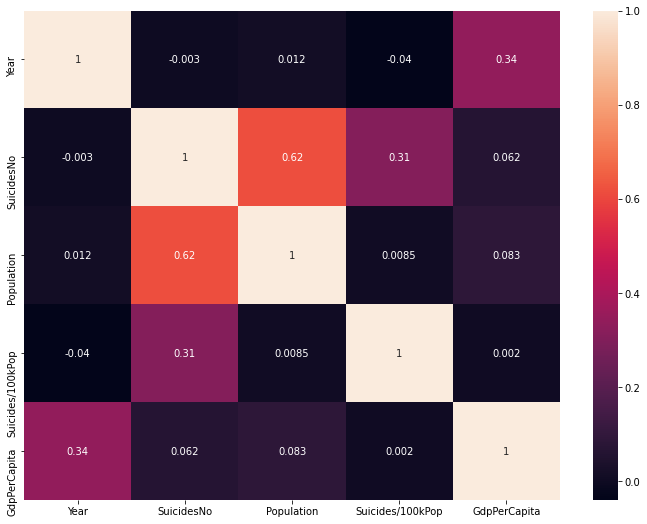

In [26]:
plt.subplots(figsize=(12,9))
sns.heatmap(df[df.Year!=2016].corr(), annot = True);